In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 第一问

In [79]:
# 初始化
customer_in = pd.Series([0])
customer_out = pd.Series([0])
station1 = 0
station2 = 0
start_customer = 0
finish_customer = 0
clock = 0

# 生成第一个事件
next_arrival = np.random.exponential(1/1.8)
next_station1_1 = 1e10
next_station1_2 = 1e10
next_station2 = 1e10

In [80]:
# 循环直到第4000个客户离开
while finish_customer < 4000:
    # 新的时间为下一个事件
    clock = min(next_station1_1,next_station1_2,next_station2,next_arrival)

    # 判断哪个事件发生了，并做出相应反应
    if next_arrival == clock:
        station1 += 1
        start_customer += 1
        # 记录第i个顾客第进入时间
        customer_in[start_customer] = clock
    elif next_station1_1 == clock:
        station1 -= 1
        station2 += 1
    elif next_station1_2 == clock:
        station1 -= 1
        station2 += 1
    elif next_station2 == clock:
        station2 -= 1
        finish_customer += 1
        # 记录第i个顾客的离开时间
        customer_out[finish_customer] = clock





    #更新事件（无记忆性）
    next_arrival = clock + np.random.exponential(1/1.8)

    if station1 >= 2:
        next_station1_1 = clock + np.random.exponential(1)
        next_station1_2 = clock + np.random.exponential(1)
    elif station1 > 0:
        next_station1_1 = clock + np.random.exponential(1)
        next_station1_2 = clock + 1e10
    else:
        next_station1_1 = clock + 1e10
        next_station1_2 = clock + 1e10

    if station2 > 0:
        next_station2 = clock + np.random.exponential(1/2)
    else:
        next_station2 = clock + 1e10


## 第二问

(array([422., 786., 581., 454., 369., 170.,  78.,  74.,  49.,  17.]),
 array([ 0.20161663,  2.63495474,  5.06829286,  7.50163097,  9.93496908,
        12.36830719, 14.8016453 , 17.23498342, 19.66832153, 22.10165964,
        24.53499775]),
 <BarContainer object of 10 artists>)

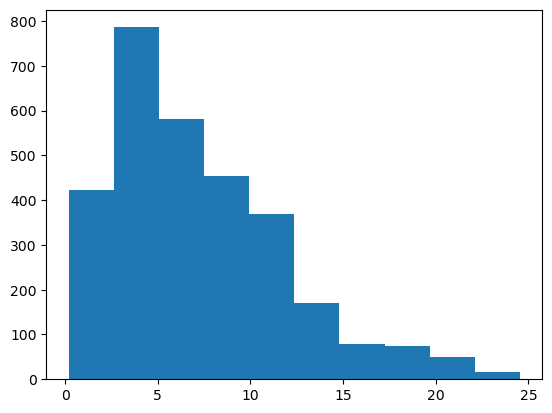

In [81]:
sojourn_time = customer_out - customer_in
warmed_sojourn_time_2 = sojourn_time[1000:4000]
plt.hist(warmed_sojourn_time_2)

In [82]:
warmed_sojourn_time_2.describe()

count    3000.000000
mean        7.228376
std         4.654082
min         0.201617
25%         3.575187
50%         6.279321
75%         9.956539
max        24.534998
dtype: float64

## 第三问

In [83]:
def lambda_exp1_norm0515(Lambda=1.8):
    # 初始化
    customer_in = pd.Series([0])
    customer_out = pd.Series([0])
    station1 = 0
    station2 = 0
    start_customer = 0
    finish_customer = 0
    clock = 0

    # 生成第一个事件
    next_arrival = np.random.exponential(1/Lambda)
    next_station1_1 = 1e10
    next_station1_2 = 1e10
    next_station2 = 1e10

    # 循环直到第4000个客户离开
    while finish_customer < 4000:
        # 新的时间为下一个事件
        clock = min(next_station1_1,next_station1_2,next_station2,next_arrival)

        # 判断station2的情况
        new_station2_normal = False

        # 判断哪个事件发生了，并做出相应反应
        if next_arrival == clock:
            station1 += 1
            start_customer += 1
            # 记录第i个顾客第进入时间
            customer_in[start_customer] = clock

        elif next_station1_1 == clock:
            station1 -= 1
            station2 += 1
            # 判断station2的情况
            if station2 == 1:
                new_station2_normal = True

        elif next_station1_2 == clock:
            station1 -= 1
            station2 += 1
            # 判断station2的情况
            if station2 == 1:
                new_station2_normal = True

        elif next_station2 == clock:
            station2 -= 1
            if station2 > 0:
                new_station2_normal = True
            finish_customer += 1
            # 记录第i个顾客的离开时间
            customer_out[finish_customer] = clock





        #更新事件（无记忆性）
        next_arrival = clock + np.random.exponential(1/Lambda)

        if station1 >= 2:
            next_station1_1 = clock + np.random.exponential(1)
            next_station1_2 = clock + np.random.exponential(1)
        elif station1 > 0:
            next_station1_1 = clock + np.random.exponential(1)
            next_station1_2 = clock + 1e10
        else:
            next_station1_1 = clock + 1e10
            next_station1_2 = clock + 1e10

        # 更新station2的情况
        if new_station2_normal:
            next_station2_add = np.random.normal(0.5,1.5)
            while next_station2_add <= 0:
                next_station2_add = np.random.normal(0.5,1.5)
            next_station2 = clock + next_station2_add

        if station2 == 0 :
            next_station2 = clock + 2e10

    # 计算输出
    sojourn_time = customer_out - customer_in
    warmed_sojourn_time = sojourn_time[1000:4000]

    return  warmed_sojourn_time

(array([320., 304., 274., 316., 304., 299., 296., 299., 291., 297.]),
 array([ 841.03871367, 1094.43457355, 1347.83043343, 1601.22629331,
        1854.62215319, 2108.01801306, 2361.41387294, 2614.80973282,
        2868.2055927 , 3121.60145258, 3374.99731246]),
 <BarContainer object of 10 artists>)

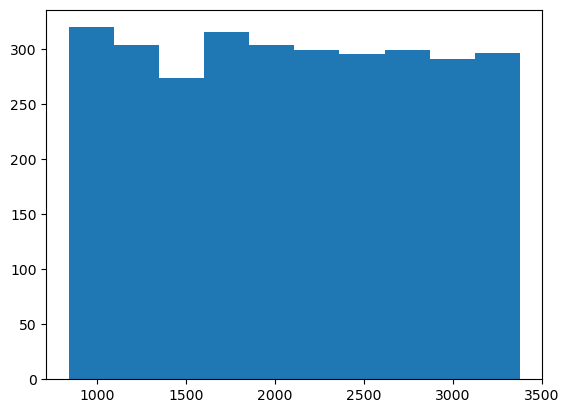

In [84]:
warmed_sojourn_time_3 = lambda_exp1_norm0515(1.8)
plt.hist(warmed_sojourn_time_3)

In [73]:
warmed_sojourn_time_3.describe()


count    3000.000000
mean     2113.900618
std       742.796528
min       866.722150
25%      1472.011689
50%      2103.253326
75%      2744.104856
max      3396.692653
dtype: float64

## 第四问

In [74]:
result_4 = pd.Series()
for Lambda in np.arange(0.05,2,0.05):
    warmed_sojourn_time_4 = lambda_exp1_norm0515(Lambda)
    result_4[Lambda] = warmed_sojourn_time_4.mean()


/var/folders/qj/s_39ngds10394t00jt5t0c4w0000gn/T/ipykernel_4741/901217226.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result_4 = pd.Series()


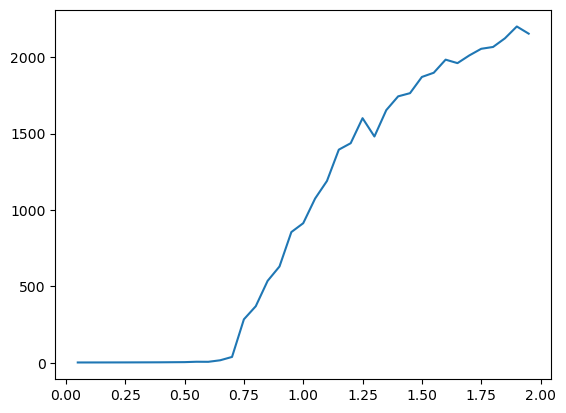

In [75]:
plt.plot(result_4)
